In [33]:
import pyodbc
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
from matplotlib import cm  # Để sử dụng colormap
import matplotlib.colors as mcolors

In [38]:
# Thông tin kết nối
server = '......'  # Tên server 
database = 'Anime_CauTruc'  # Tên database
username = 'sa'  # Username
password = '.....'  # Password 

In [39]:
# Tạo kết nối
conn = pyodbc.connect(
    f"DRIVER={{ODBC Driver 17 for SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password}"
)

Genres

In [19]:
# Câu truy vấn SQL
query = """
  select GenreName, count(Anime_genres.AnimegenresID) as SoLuong
  from Genres inner join Anime_genres on Genres.GenresID = Anime_genres.GenresID
  group by GenreName
"""

# Đọc dữ liệu vào DataFrame
df = pd.read_sql(query, conn)

# Kiểm tra dữ liệu
print(df.head())

# # Đóng kết nối
# conn.close()


      GenreName  SoLuong
0       Gourmet      101
1        Parody      431
2      Suspense      316
3  Idols (Male)       73
4     Workplace      150


C:\Users\OS\AppData\Local\Temp\ipykernel_18840\1574144556.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


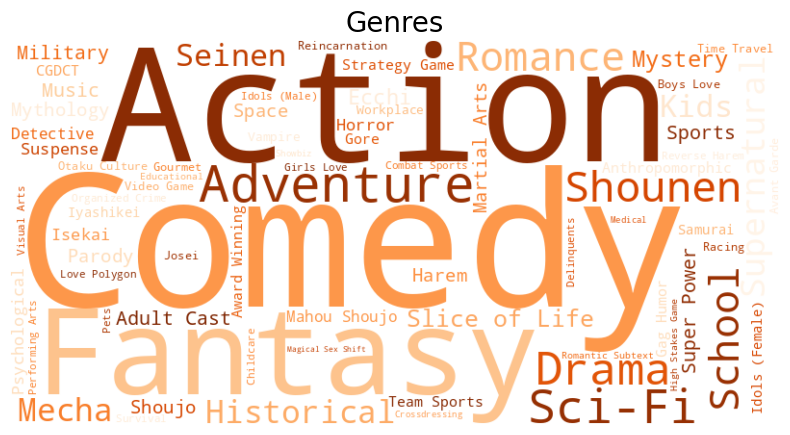

In [20]:
# Chuyển đổi DataFrame thành từ điển {từ: tần suất}
word_freq = dict(zip(df['GenreName'], df['SoLuong']))

# Tạo WordCloud từ từ điển
wordcloud = WordCloud(
    width=800, height=400, 
    background_color='white', 
    colormap='Oranges'  # Bảng màu
).generate_from_frequencies(word_freq)

# Vẽ WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Tắt trục
plt.title("Genres", fontsize=20)
plt.show()

Studio

In [21]:
# Câu truy vấn SQL
query2 = """
 select StudioName, count(Anime_Studio.StudioID) as SoLuong
  from Studio inner join Anime_Studio on Studio.StudioID = Anime_Studio.StudioID
  group by StudioName
"""

# Đọc dữ liệu vào DataFrame
df2 = pd.read_sql(query2, conn)

# Kiểm tra dữ liệu
print(df2.head())

# # Đóng kết nối
# conn.close()


       StudioName  SoLuong
0       100studio        1
1         10Gauge        3
2               2        3
3  2:10 Animation        5
4          3D Co.        1


C:\Users\OS\AppData\Local\Temp\ipykernel_18840\4096138142.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df2 = pd.read_sql(query2, conn)


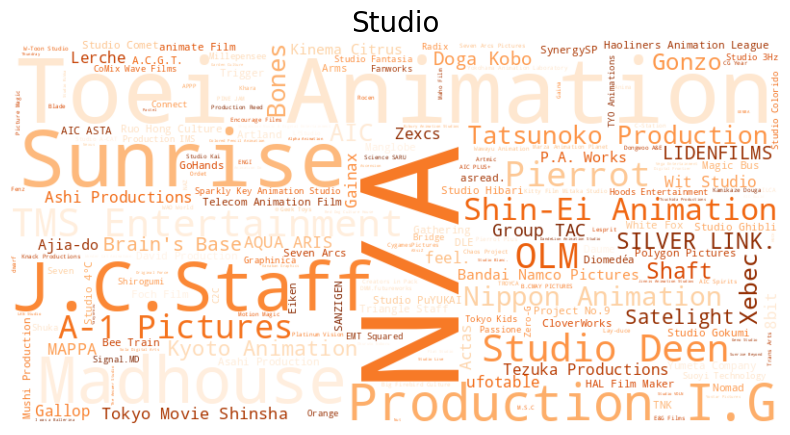

In [22]:
# Chuyển đổi DataFrame thành từ điển {từ: tần suất}
word_freq2 = dict(zip(df2['StudioName'], df2['SoLuong']))

# Tạo WordCloud từ từ điển
wordcloud2 = WordCloud(
    width=800, height=400, 
    background_color='white', 
    colormap='Oranges'  # Bảng màu
).generate_from_frequencies(word_freq2)

# Vẽ WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis('off')  # Tắt trục
plt.title("Studio", fontsize=20)
plt.show()

Top 10 Anime được nhiều người xem nhất

In [23]:
# Câu truy vấn SQL
query3 = """
SELECT TOP 10 A.AnimeName, S.Members
FROM Anime A
JOIN Statistic S ON A.StatisticID = S.StatisticID
ORDER BY S.Members DESC;

"""
# Đọc dữ liệu vào DataFrame
df3 = pd.read_sql(query3, conn)

# Kiểm tra dữ liệu
print(df3.head())

# # Đóng kết nối
# conn.close()


C:\Users\OS\AppData\Local\Temp\ipykernel_18840\1942604644.py:10: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df3 = pd.read_sql(query3, conn)


                          AnimeName  Members
0                Shingeki no Kyojin  4031992
1                        Death Note  3982950
2  Fullmetal Alchemist: Brotherhood  3414129
3                     One Punch Man  3286704
4                  Sword Art Online  3126014


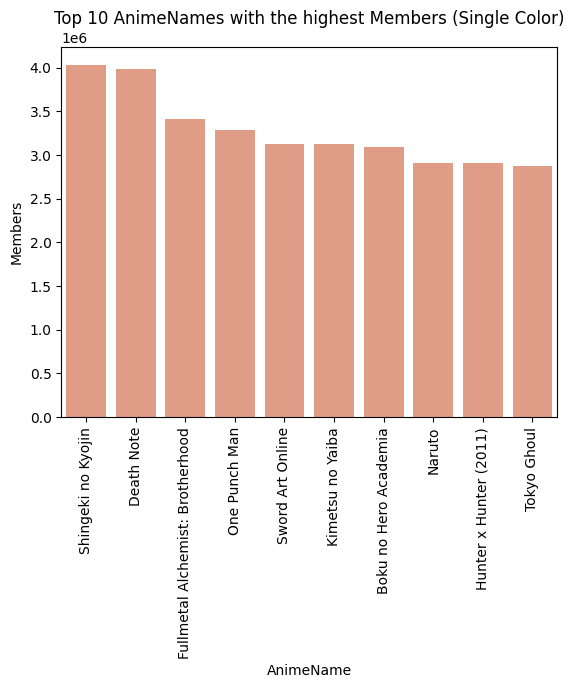

In [26]:
# Màu HEX duy nhất cho tất cả các cột
single_color = '#ee9679'  # mã màu

# Vẽ biểu đồ
sns.barplot(x='AnimeName', y='Members', data=df3, color=single_color)

# Tùy chỉnh biểu đồ
plt.xticks(rotation=90)
plt.title('Top 10 AnimeNames with the highest Members (Single Color)')
plt.show()


Tình trạng phim 

In [27]:
query4 = """
SELECT AnimeStatus, COUNT(AnimeID) AS AnimeCount
FROM Anime
GROUP BY AnimeStatus;
"""
# Đọc dữ liệu vào DataFrame
df4 = pd.read_sql(query4, conn)

# Kiểm tra dữ liệu
print(df4.head())

# # Đóng kết nối
# conn.close()


C:\Users\OS\AppData\Local\Temp\ipykernel_18840\3653520962.py:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df4 = pd.read_sql(query4, conn)


        AnimeStatus  AnimeCount
0  Currently Airing         108
1   Finished Airing       11098


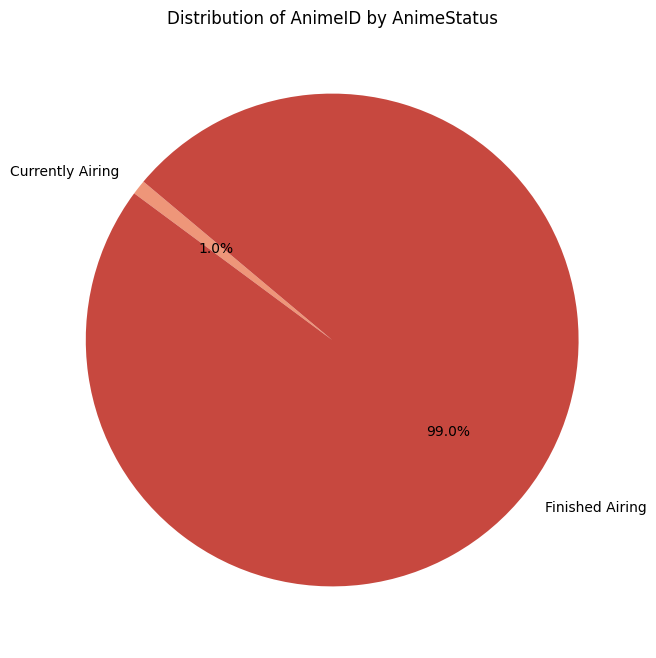

In [30]:
# Danh sách mã màu HEX 
colors = [ '#ee9679','#c7483f']

# Vẽ biểu đồ tròn với mã màu
plt.figure(figsize=(8, 8))
plt.pie(
    df4['AnimeCount'], 
    labels=df4['AnimeStatus'], 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=colors[:len(df4)]  # Chỉ sử dụng số lượng màu tương ứng với số trạng thái
)
plt.title('Distribution of AnimeID by AnimeStatus')
plt.show()

Rating

In [ ]:
# Truy vấn để đếm anime_id theo từng rating
query5 = """
    SELECT Rating, COUNT(AnimeID) as Count
    FROM Anime inner join Rating on Anime.RatingID = Rating.RatingID
    GROUP BY Rating
    ORDER BY Count DESC;
"""
cursor = conn.cursor()
cursor.execute(query5)
# Lấy kết quả
results = cursor.fetchall()
# In kết quả để kiểm tra
for row in results:
    print(f"Rating: {row[0]}, Count: {row[1]}")

# Tách dữ liệu từ kết quả truy vấn
ratings = [row[0] for row in results]  # Cột 'Rating'
count1 = [row[1] for row in results]  # Cột 'Count'


Rating: PG-13, Count: 6384
Rating: G, Count: 1924
Rating: R-17+, Count: 1217
Rating: PG, Count: 858
Rating: R+, Count: 762
Rating: None, Count: 61


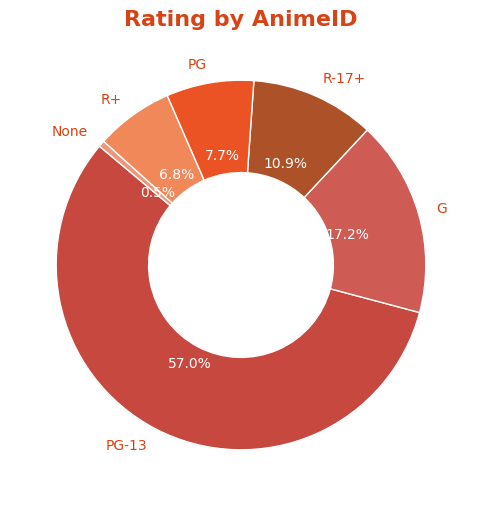

In [32]:
# Tùy chỉnh màu sắc (hoặc sử dụng tự động)
colors = ['#c7483f', '#ce5b54', '#ad5128', '#eb5325', '#f1885a', '#ee9679']

# Tạo biểu đồ Donut
fig, ax = plt.subplots(figsize=(6, 6))
wedges, texts, autotexts = ax.pie(
    count1, 
    labels=ratings, 
    autopct='%1.1f%%',  # Hiển thị phần trăm
    colors=colors, 
    startangle=140, 
    wedgeprops=dict(width=0.5, edgecolor='w')  # Độ rộng của vòng tròn
)

# Tùy chỉnh tiêu đề và style
ax.set_title("Rating by AnimeID", fontsize=16, weight='bold', color='#D84315')

# Chỉnh màu sắc cho các nhãn (labels)
for text in texts:
    text.set_color('#D84315')  # Đổi màu nhãn thành màu cam đỏ

# Chỉnh màu sắc cho các phần trăm trong biểu đồ (autotexts)
for autotext in autotexts:
    autotext.set_color('#ffffff')  # Đổi màu phần trăm thành màu cam đỏ

# Hiển thị biểu đồ
plt.show()


Số Anime trong 1 năm phát hành

In [ ]:
# Truy vấn để đếm AnimeID theo từng năm
query6 = """
    SELECT RIGHT(Premiered, 4) AS Anime_Year, COUNT(Anime.AnimeID) as Count
  FROM Anime INNER JOIN Premiered ON Anime.PremieredID = Premiered.PremieredID
  GROUP BY RIGHT(Premiered, 4)
  ORDER BY RIGHT(Premiered, 4) ASC
"""
df6 = pd.read_sql(query6, conn)

# Xóa dòng N/A
df6 = df6[df6['Anime_Year'] != 'N/A']

# Kiểm tra dữ liệu
print(df6)

#Đóng kết nối
conn.close()


   Anime_Year  Count
0        1962      1
1        1963      4
2        1964      3
3        1965      7
4        1966      6
..        ...    ...
58       2020    151
59       2021    181
60       2022    173
61       2023    209
62       2024    149

[63 rows x 2 columns]


C:\Users\OS\AppData\Local\Temp\ipykernel_18840\2119848985.py:26: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df6 = pd.read_sql(query6, conn)


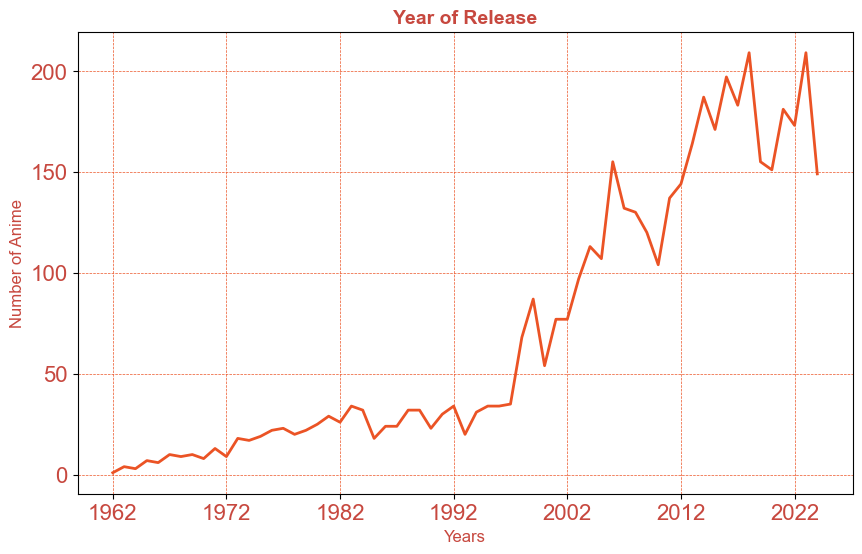

In [50]:
import matplotlib as mpl

# Thiết lập màu sắc theo biểu đồ bạn yêu cầu
colors = ['#c7483f', '#ce5b54', '#ad5128', '#eb5325', '#f1885a', '#ee9679']

# Vẽ biểu đồ đường
plt.figure(figsize=(10, 6))  # Kích thước của biểu đồ
plt.plot(df6['Anime_Year'], df6['Count'], color='#eb5325', linestyle='-', linewidth=2, markersize=6)

# Thêm tiêu đề và nhãn cho các trục với font giống như biểu đồ gốc
mpl.rcParams.update({'font.family': 'Arial', 'font.size': 16})  # Cập nhật font chữ

# Cập nhật các chi tiết của biểu đồ
plt.title('Year of Release', fontsize=14, color='#c7483f',fontweight='bold')  # Tiêu đề với màu đỏ tương tự
plt.xlabel('Years', fontsize=12, color='#c7483f')  # Nhãn trục X với màu đỏ
plt.ylabel('Number of Anime', fontsize=12, color='#c7483f')  # Nhãn trục Y với màu đỏ

# Thay đổi màu sắc thang đo
plt.xticks(ticks=df6['Anime_Year'][::10], color='#c7483f')   # Màu thang đo trục X
plt.tick_params(axis='y', labelcolor='#c7483f')  # Màu thang đo trục Y

# Hiển thị lưới cho dễ nhìn
plt.grid(True, color='#eb5325', linestyle='--', linewidth=0.5)

# Hiển thị biểu đồ
plt.show()


AnimeType

C:\Users\OS\AppData\Local\Temp\ipykernel_18840\2047608020.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df7 = pd.read_sql_query(query7, conn)
C:\Users\OS\AppData\Local\Temp\ipykernel_18840\2047608020.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('Oranges', n_colors)  # Lấy colormap 'Oranges' với số màu = len(df)


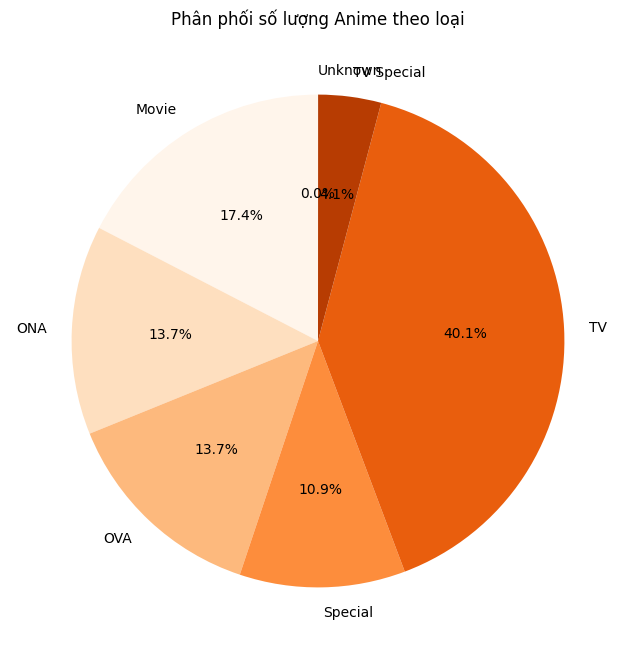

In [34]:
# Truy vấn tính số lượng AnimeID theo AnimeType
query7 = """
SELECT t.AnimeType, COUNT(a.AnimeName) AS AnimeCount
    FROM   Anime a 
    JOIN   AnimeType t ON a.AnimeTypeID = t.AnimeTypeID
    GROUP BY t.AnimeType
"""
df7 = pd.read_sql_query(query7, conn)

# Sử dụng colormap Oranges để tạo màu nhạt dần
n_colors = len(df7)
cmap = cm.get_cmap('Oranges', n_colors)  # Lấy colormap 'Oranges' với số màu = len(df)
colors = [mcolors.to_hex(cmap(i)) for i in range(n_colors)]

# Vẽ biểu đồ tròn
plt.figure(figsize=(8, 8))
plt.pie(df7['AnimeCount'], labels=df7['AnimeType'], autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Phân phối số lượng Anime theo loại')
plt.show()


Phân phối điểm số

C:\Users\OS\AppData\Local\Temp\ipykernel_18840\1056839215.py:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df8 = pd.read_sql_query(query8, conn)


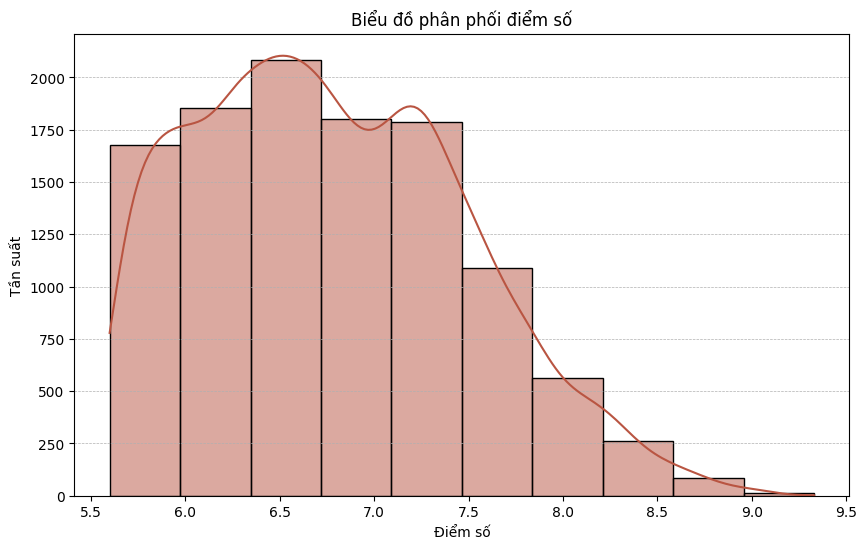

In [ ]:
# truy vấn điểm
query8= """
SELECT st.Score
    FROM Anime a
    JOIN Statistic st ON a.StatisticID = st.StatisticID
"""
df8 = pd.read_sql_query(query8, conn)

# Vẽ biểu đồ phân phối
plt.figure(figsize=(10, 6))
sns.histplot(df8['Score'], bins=10, kde=True, color='#b95542')
plt.title('Biểu đồ phân phối điểm số')
plt.xlabel('Điểm số')
plt.ylabel('Tần suất')
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.show()
#Đóng kết nối
conn.close()
